In [135]:
import pymongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["dev"]
mycol = mydb["voyager"]
myquery = { "d_userid":"SUahZZjikgyrNKVY" }
mydoc = mycol.find(myquery)
links = []
records = []
for x in mydoc:
    del x["_created_at"]
    del x["_updated_at"]
    records.append(x)
    links.append(x["d_path"].replace(",","/"))
records = sorted(records, key=lambda x: x["d_timestamp"])

In [146]:
# pth = []
# for item in records:
# #     if "vis-" in item['d_path']:
# #         pth.append(item['d_path'])
#     if "vis-" in item['d_xpath']:
#         pth.append(item['d_xpath'])
# set(pth)
# keynodes = 
# [
#     ["DIV#groupDescription.col-md-6", "Group Description"],
#     ["DIV#systemDescription.col-md-6", "System Description"],
#     ["DIV#.input-group.row.mainpage", "Search Bar"],
#     ["DIV#overviewTable.col-md-12.VueTables.VueTables--client,TABLE#.VueTables__table.table.table-striped.table-bordered.table-hover", "Search Result"],
#     ["DIV#vuetable.VueTables.VueTables--client,TABLE#.VueTables__table.table.table-striped.table-bordered.table-hover","Result Records"],
#     ["DIV#.form-group.form-inline.pull-left.VueTables__search","Result filter"],
#     ["UL#.pagination.VuePagination__pagination","Page Switch"],
#     ["DIV#leaveComments.col-md-12","Comments"]
# ]

In [147]:

# css, xptah
keynodes = [
    [".pane.data-pane.noselect", "", "Data panel"],
    [".pane.encoding-pane", "", "Encoding panel"],
    [".specified-vis-pane.vflex.card.no-top-margin.ng-scope","", "Specific view"],
#     first page
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[1]","1_Cylinder"],
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[2]","1_Name"],
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[3]","1_Origin"],
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[4]","1_Year"],
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[5]","1_BIN(Acceleration)"],
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[6]","1_BIN(Displacement)"],
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[7]","1_BIN(Horsepower)"],
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[8]","1_BIN(MPG)"],
    ["","id(\"alternatives-histograms\")/DIV[2]/DIV[9]","1_BIN(Wei_in_LBS)"],
#     second page
    ["#vis-37","", "2_Summaries"],
    ["#vis-38","", "2_AE_1"],
    ["#vis-39","", "2_AE_2"],
    ["#vis-40","", "2_AE_3"],
    ["#vis-41","", "2_AE_4"],
]

def filterSeuqences(records):
    seq = []
    for record in records:
        for node in keynodes:
            if len(node[0])!=0 and node[0] in record["d_path"]:
                seq.append([node[2], record])
            elif len(node[1])!=0 and node[1] in record["d_xpath"]:
                seq.append([node[2], record])
    return seq
sequences = filterSeuqences(records)
len(sequences)

4907

In [138]:
import json
with open("data.json","w+") as f:
    json.dump(sequences, f)


In [150]:
import json
sequences=[]
with open("data.json") as f:
    sequences = json.load(f)


In [151]:
def overallSequence(sequences):
    starttime = sequences[0][1]["d_timestamp"]
    nodeseq = [["root", 0]]
    print(starttime, )
    for record in sequences:
        if nodeseq[-1][0] == record[0]:
            if 'x' in record[1]:
                nodeseq[-1][2].append([record[1]["type"], record[1]['x'], record[1]['y'], record[1]["d_timestamp"]])
            else:
                nodeseq[-1][2].append([record[1]["type"], -1, -1])
            pass
        else:
            if 'x' in record[1]:
                nodeseq.append([record[0], (record[1]["d_timestamp"]-starttime)/1000, [[record[1]["type"], record[1]['x'], record[1]['y'],record[1]["d_timestamp"]]]])
            else:
                nodeseq.append([record[0], (record[1]["d_timestamp"]-starttime)/1000, [[record[1]["type"], -1, -1, record[1]["d_timestamp"]]]])
    return nodeseq
def cleanSequence(sequences):
    tmp = []
    for item in sequences:
        if item[0]=="Other" and item[1] < 1:
            continue
        else:
            tmp.append(item)
    return tmp
nodesequence = overallSequence(sequences)

1623773479170.0


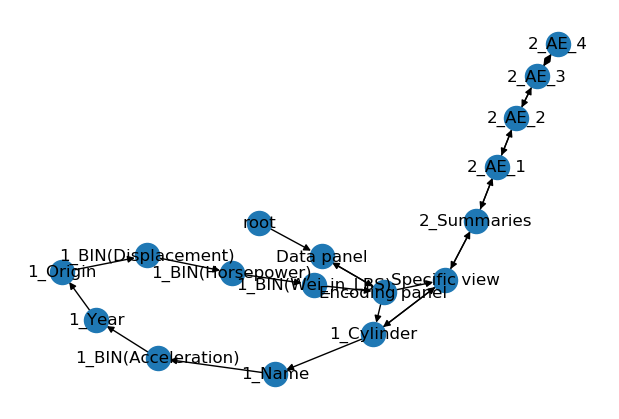

In [152]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
for index in range(1, len(nodesequence)):
    G.add_node(nodesequence[index][0])
    G.add_edge(nodesequence[index-1][0], nodesequence[index][0])
nx.draw(G, with_labels=True)

plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500
plt.show()

In [153]:
# spend time distribution in view
# effective time: hover time on the elements
time_distribution = {}
for index in range(1, len(nodesequence)):
    name = nodesequence[index][0]
    abs_starttime = nodesequence[index][1]
    rel_starttime = nodesequence[index][2][0][3]
    rel_endtime = nodesequence[index][2][-1][3]
    if name in time_distribution:
        time_distribution[name].append( (rel_endtime-rel_starttime)/1000 )
    else:
        time_distribution[name] = [(rel_endtime-rel_starttime)/1000]
time_distribution

{'Data panel': [5.298, 2.489, 2.071, 2.652, 0.455, 3.454],
 'Encoding panel': [7.552, 2.416, 1.074, 0.482, 6.29, 1.576, 1.027],
 '1_Cylinder': [1.006, 3.306],
 'Specific view': [1.723, 6.663, 15.496],
 '1_Name': [0.041],
 '1_BIN(Acceleration)': [3.222],
 '1_Year': [2.924],
 '1_Origin': [0.001],
 '1_BIN(Displacement)': [4.648],
 '1_BIN(Horsepower)': [0.013],
 '1_BIN(Wei_in_LBS)': [0.002],
 '2_Summaries': [3.407, 2.405],
 '2_AE_1': [2.616, 0.928],
 '2_AE_2': [2.691, 1.465],
 '2_AE_3': [6.737, 2.876],
 '2_AE_4': [8.313]}

In [154]:
print(nx.is_strongly_connected(G))
print(nx.is_weakly_connected(G))

False
True


Text(0.5, 1.0, 'Degree distribution network')

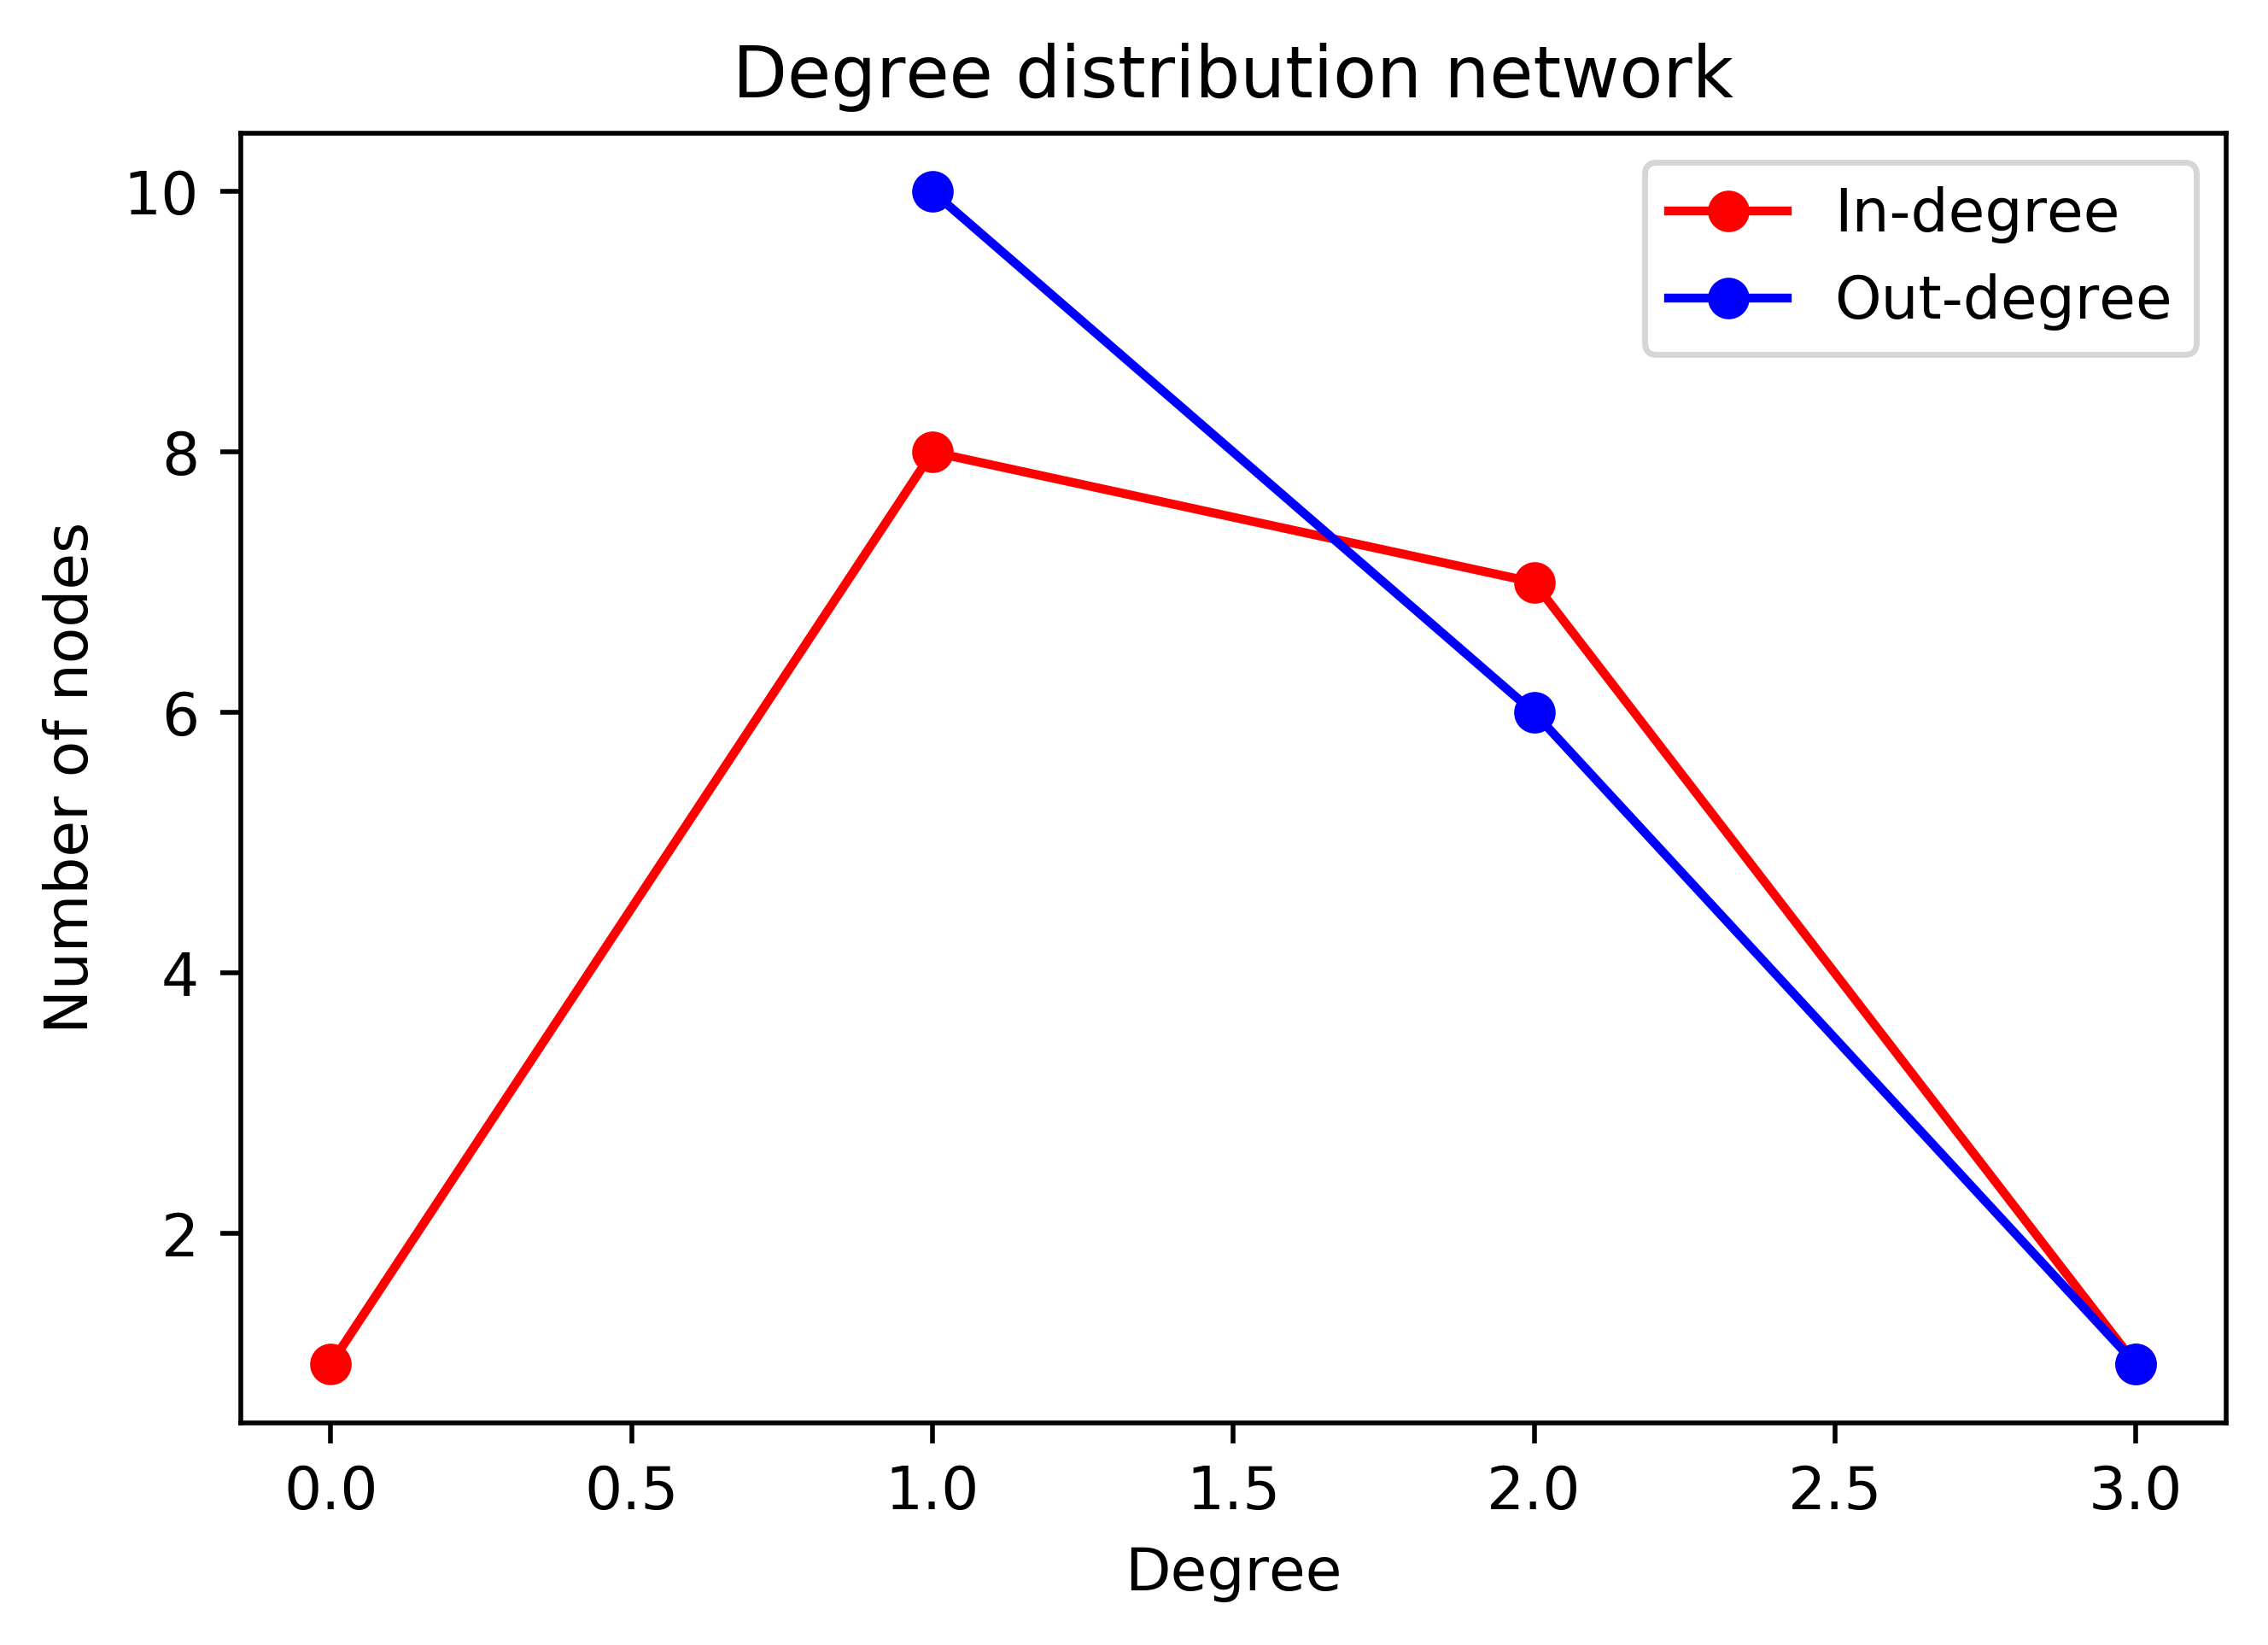

In [155]:
nnodes = G.number_of_nodes()
degrees_in = [d for n, d in G.in_degree()]
degrees_out = [d for n, d in G.out_degree()]
avrg_degree_in = sum(degrees_in) / float(nnodes)
avrg_degree_out = sum(degrees_out) / float(nnodes)
 
in_values = sorted(set(degrees_in))
in_hist = [degrees_in.count(x) for x in in_values]
out_values = sorted(set(degrees_out))
out_hist = [degrees_out.count(x) for x in out_values]
 
plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bo-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution network')
# plt.close()

In [102]:
# reading behavior distribution in view

In [156]:
# two_step
view_steps = []
for index in range(1, len(nodesequence)-2):
    view_steps.append([nodesequence[index][0],nodesequence[index+1][0],nodesequence[index+2][0]])

In [157]:
def getSteps(node):
    ko = []
    for item in view_steps:
        if item[1]==node:
            ko.append(item)
#             print(item)
    return ko
view_steps

[['Data panel', 'Encoding panel', '1_Cylinder'],
 ['Encoding panel', '1_Cylinder', 'Specific view'],
 ['1_Cylinder', 'Specific view', '1_Cylinder'],
 ['Specific view', '1_Cylinder', '1_Name'],
 ['1_Cylinder', '1_Name', '1_BIN(Acceleration)'],
 ['1_Name', '1_BIN(Acceleration)', '1_Year'],
 ['1_BIN(Acceleration)', '1_Year', '1_Origin'],
 ['1_Year', '1_Origin', '1_BIN(Displacement)'],
 ['1_Origin', '1_BIN(Displacement)', '1_BIN(Horsepower)'],
 ['1_BIN(Displacement)', '1_BIN(Horsepower)', '1_BIN(Wei_in_LBS)'],
 ['1_BIN(Horsepower)', '1_BIN(Wei_in_LBS)', 'Encoding panel'],
 ['1_BIN(Wei_in_LBS)', 'Encoding panel', 'Data panel'],
 ['Encoding panel', 'Data panel', 'Encoding panel'],
 ['Data panel', 'Encoding panel', 'Data panel'],
 ['Encoding panel', 'Data panel', 'Encoding panel'],
 ['Data panel', 'Encoding panel', 'Data panel'],
 ['Encoding panel', 'Data panel', 'Encoding panel'],
 ['Data panel', 'Encoding panel', 'Data panel'],
 ['Encoding panel', 'Data panel', 'Encoding panel'],
 ['Data pa

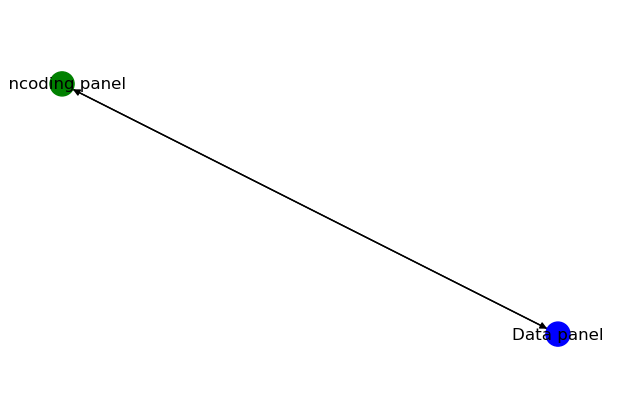


-----------------



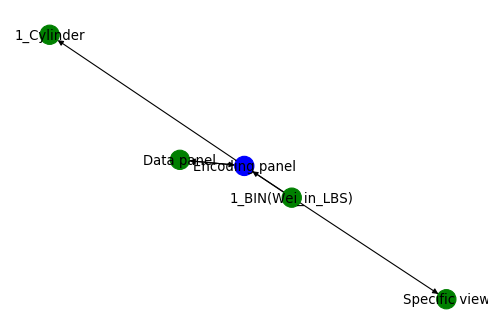


-----------------



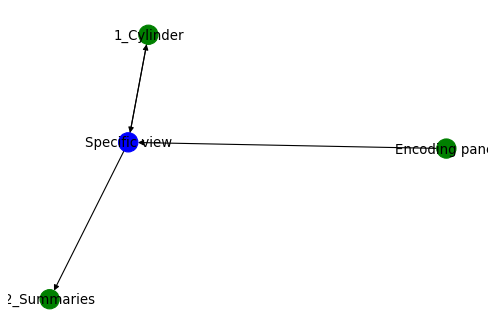


-----------------



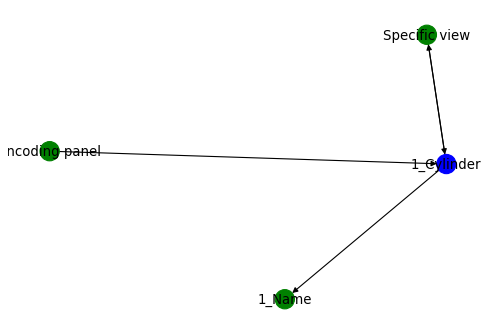


-----------------



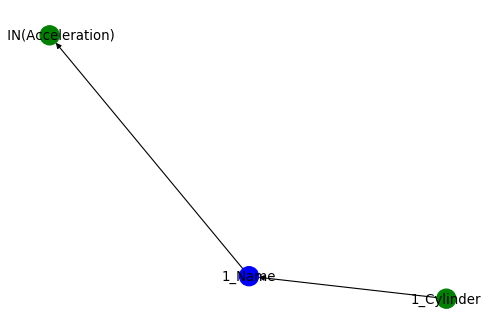


-----------------



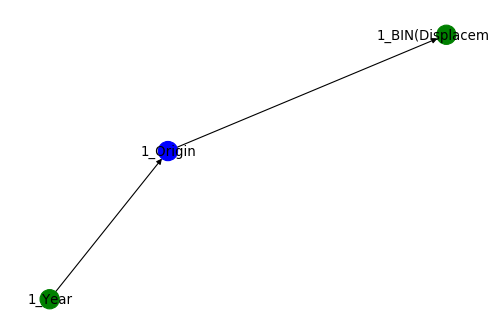


-----------------



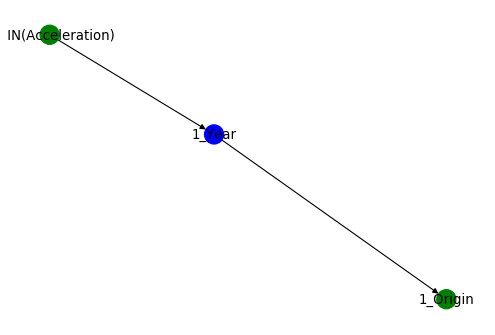


-----------------



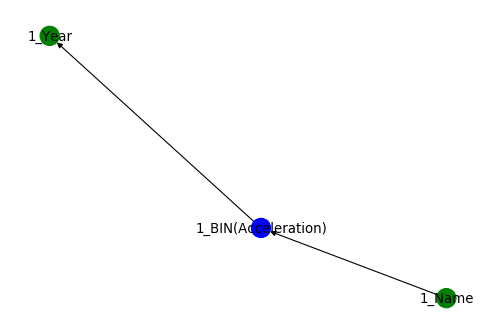


-----------------



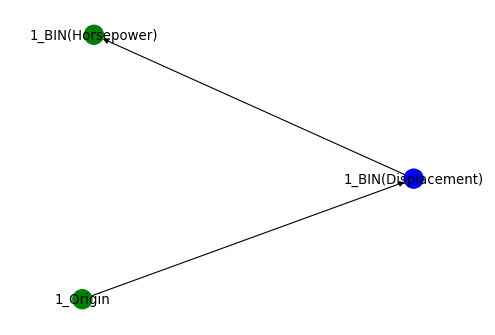


-----------------



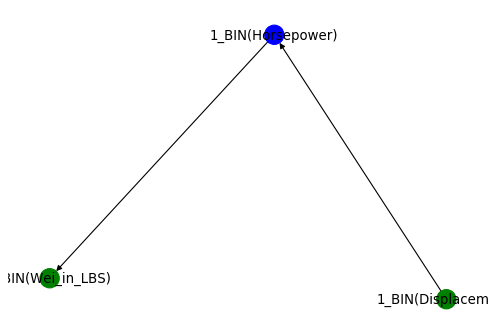


-----------------



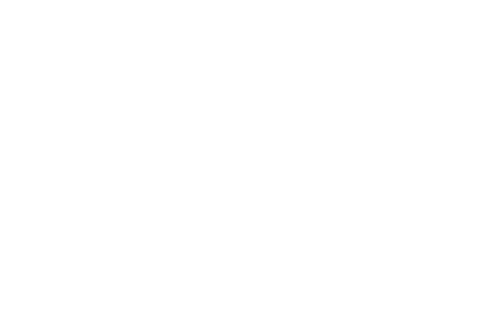


-----------------



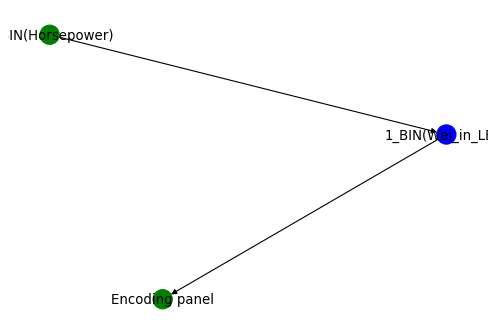


-----------------



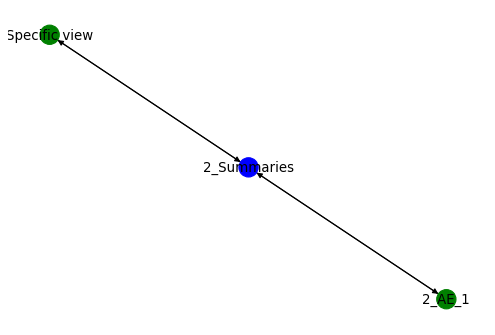


-----------------



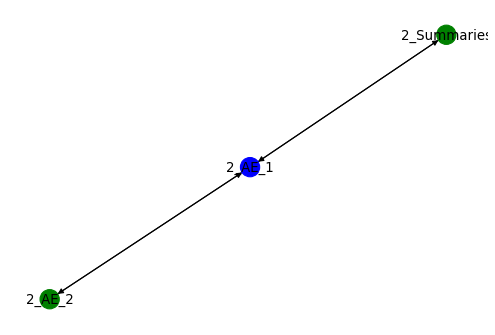


-----------------



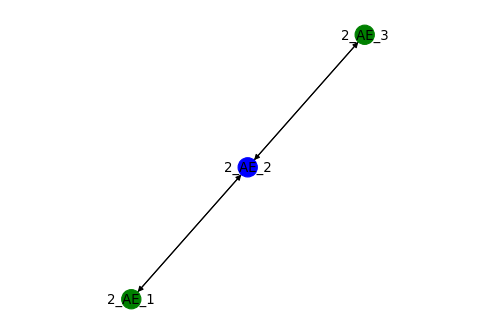


-----------------



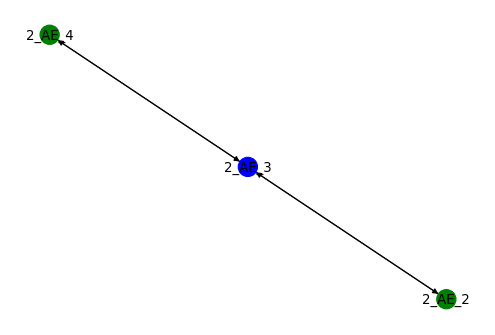


-----------------



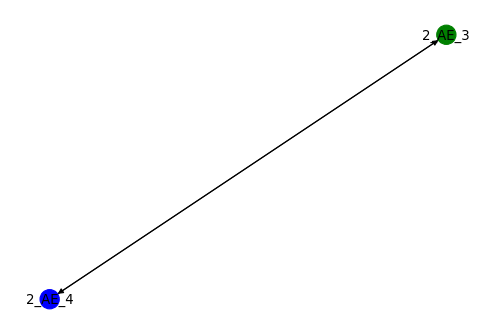


-----------------



In [159]:
for item in keynodes:
    nodes = getSteps(item[2])
    g = nx.DiGraph()
    color_map=[]
    for index in range(0, len(nodes)):
        g.add_node(nodes[index][0])
        g.add_node(nodes[index][1])
        g.add_node(nodes[index][2])
        g.add_edge(nodes[index][0], nodes[index][1])
        g.add_edge(nodes[index][1], nodes[index][2])
    if len(nodes) > 0:
        for node in g:
            if node == nodes[0][1]:
                color_map.append('blue')
            else: 
                color_map.append('green')
    nx.draw(g, node_color=color_map, with_labels=True)
    plt.rcParams['figure.dpi'] = 80
    plt.rcParams['savefig.dpi'] = 80
    plt.show()
    print("\n-----------------\n")